# SDSS SQL Query

An example of an SQL query of the Sloan Digital Sky Survey (SDSS) database using the astroquery package. We will search for objects classed as galaxies and get their magnitudes in different filters.

In [4]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [167]:
'''
This is the SQL query. As an example we will select 40000  objects and get their positions (ra and dec), 
ugriz magnitudes, class and redshift.

Note that photometric and spectroscopic data is stored in separate tables so we need to join these together
which we can do using the object id.

We will filter the objects on class so that we only select galaxies (not stars or quasars)
'''
query = "SELECT TOP 40000 p.objid,p.ra,p.dec,p.u,p.err_u,p.g,p.err_g,p.r,p.err_r,\
    s.class,s.z AS redshift\
    FROM PhotoObj AS p\
    JOIN SpecObj AS s ON s.bestobjid = p.objid\
    AND class = 'GALAXY'\
    AND s.z > 0.01\
    AND zWarning = 0\
    AND p.err_g < 0.5\
    AND p.err_r < 0.5\
    AND p.err_u < 0.5"

galaxy_table = SDSS.query_sql(query)

/home/phil/anaconda3/lib/python3.7/site-packages/astroquery/sdss/core.py:865: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


Just out of curiosity we will use the ugriz magnitudes (u, g, r, i and z are optical wavelength filters, u covers shorter wavelength, z longer wavelengths), to plot colour and magnitude information about the galaxies and see if we can spot any relations.

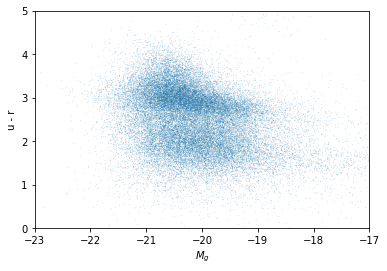

In [171]:
#The magnitudes given in the table are apparent magnitudes, ie how bright the galaxies appear from Earth
#In order to compare the magnitudes in a meaningful way we need to get the absolute magnitudes,
#for which we need to use the redshift to calculate the distance to the galaxies
def z2pc(z):
    '''
    returns the distance in parsecs 
    given an object's redshift
    '''

    #constants
    c = 3e+8 #m/s
    H_0 = (70 * 1000)/3.086e22 #Converting from km/s/Mpc to s^-1

    #distance
    d = (c*z)/(H_0) / 3.1e16 #convert to parsecs

    return d

redshift = galaxy_table['redshift']
distance = np.array(z2pc(redshift))

#Select the magnitudes from our new table
u = galaxy_table['u']
g = galaxy_table['g']
r = galaxy_table['r']

#We will convert the g-band magnitude to an absolute magnitude using the distance modulus equation
abs_g = g - 5*np.log10(distance/10)

#To get relative some colour information we will use u - r
colour = u - r

plt.plot(abs_g, colour, 'o', ms=0.05)
plt.xlabel(r'$M_g$')
plt.ylabel('u - r')
plt.xlim(-23,-17)
plt.ylim(0, 5)
plt.show()

So here is a plot of colour vs brightness for a sample of galaxies in the SDSS database. From bottom to top colour goes from blue to red, and brightness increases from right to left. 

It looks like there are two distinct groups of galaxies, with a lower number of galaxies between them. These groups are known to be the red sequence (the top 'redder' group) which is made of older, passive galaxies, and the blue star-forming sequence which is made of younger galaxies with on-going star formation. The lower density region between the two groups is the 'green valley', and is thought to be made of galaxies transitioning between the blue and red sequences.

Interestingly, tidal disruption events (TDEs), events in which a star is torn apart by a supermassive black hole, have a stange preference to occur in green valley galaxies. A key area of TDE research is figuring out why this is the case.